# Basic analysis of conn.log

Date: Feb, 25, 2019

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
conn = pd.read_csv('conn_1.log', sep='\t')

/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
conn.shape

(10447787, 21)

In [4]:
conn.columns = [
    "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", 
    "id.resp_p", "proto", "service", "duration", "orig_bytes", 
    "resp_bytes", "conn_state", "local_orig", "local_resp", 
    "missed_bytes", "history", "orig_pkts", "orig_ip_bytes", 
    "resp_pkts", "resp_ip_bytes", "tunnel_parents"
]

In [5]:
conn.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,1.5454e+09,CgzGV333k9WCximeu8,192.168.1.196,59932.0,104.248.160.24,80.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,-
1,1.5454e+09,CLm5Pd3ZnqmYVjrZ44,192.168.1.196,59932.0,104.248.160.24,80.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,-
2,1.5454e+09,CDn2pd1rDD1lCMXAia,192.168.1.196,35883.0,192.168.1.1,53.0,udp,dns,5.005148,78,...,S0,-,-,0.0,D,2.0,134.0,0.0,0.0,-
3,1.5454e+09,C1NKkV3tB4rImzbpDj,192.168.1.196,43531.0,192.168.1.1,53.0,udp,dns,5.005145,78,...,S0,-,-,0.0,D,2.0,134.0,0.0,0.0,-
4,1.5454e+09,C54pqniZgZpZ7CtKl,192.168.1.196,59932.0,104.248.160.24,80.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,-


In [6]:
features = conn[
    ['ts', 'id.orig_h', 'id.orig_p', 'id.resp_h', 
     'id.resp_p', 'proto', 'conn_state', 'orig_bytes']
]

In [7]:
features.shape

(10447787, 8)

In [8]:
features['conn_state'].value_counts()

# S0 - Connection attempt seen, no reply
# RSTOS0 - ORIG sent SYN then RST; no RESP SYN-ACK
# OTH - No SYN, not closed. Midstream traffic. Partial connection.

S0        8258213
RSTOS0    2119498
OTH         67174
REJ          1949
SF            747
SH             59
RSTO           52
RSTR           47
S2             26
S1             19
RSTRH           1
S3              1
Name: conn_state, dtype: int64

In [9]:
features.orig_bytes = features.orig_bytes.str.replace('-', '0')
features.orig_bytes.fillna(0, inplace=True)
features['orig_bytes_num'] = features.orig_bytes.apply(int)

/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [10]:
orig_bytes_num_sample = features['orig_bytes_num'].sample(5000)

In [11]:
orig_bytes_num_sample.value_counts()

0              4964
29890548767       1
23346387774       1
27710087163       1
40845656007       1
29536460647       1
29135496868       1
24867722874       1
32614773746       1
31735954311       1
33985465201       1
18341432153       1
48598938262       1
32113197616       1
34540220714       1
48115083413       1
13000677379       1
27842753519       1
32861097826       1
33474019160       1
24638305867       1
35480502012       1
22749156861       1
32131564775       1
26605525876       1
26751052642       1
27115714200       1
27912218170       1
33787606524       1
36825474190       1
29369494115       1
21907988910       1
28369064296       1
33365930096       1
25577783314       1
20276858780       1
30193015978       1
Name: orig_bytes_num, dtype: int64

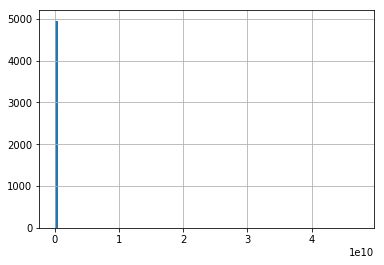

In [12]:
features['orig_bytes_num'].sample(5000).hist(bins=100)

In [13]:
features.head()

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,orig_bytes,orig_bytes_num
0,1.5454e+09,192.168.1.196,59932.0,104.248.160.24,80.0,tcp,S0,0,0
1,1.5454e+09,192.168.1.196,59932.0,104.248.160.24,80.0,tcp,S0,0,0
2,1.5454e+09,192.168.1.196,35883.0,192.168.1.1,53.0,udp,S0,78,78
3,1.5454e+09,192.168.1.196,43531.0,192.168.1.1,53.0,udp,S0,78,78
4,1.5454e+09,192.168.1.196,59932.0,104.248.160.24,80.0,tcp,S0,0,0


In [14]:
pornhub_ip = '216.18.168.16'

In [15]:
porn_conn = features[features['id.resp_h'] == pornhub_ip]

In [16]:
features['id.resp_h'].value_counts()

54.39.87.104       1008351
209.97.190.136      908544
216.18.168.16       268405
192.168.1.196         1655
192.168.1.1           1481
82.113.53.40           198
31.31.74.35            179
83.167.252.118         139
89.221.210.188         113
89.221.212.46          106
212.96.160.147          93
104.248.160.24          92
80.79.25.111            79
89.221.214.130          79
172.217.23.206          78
147.231.100.5           74
37.187.104.44           73
81.2.248.189            71
94.124.107.190          63
129.215.160.240         43
37.157.194.44           43
147.251.48.140          41
81.200.57.13            30
194.182.80.233          27
78.108.102.237          26
77.78.107.252           23
46.28.109.26            22
185.189.115.149         22
81.2.254.32             20
5.1.56.123              17
                    ...   
213.252.226.172          1
56.63.126.125            1
197.152.234.144          1
33.40.98.43              1
183.92.94.135            1
200.175.175.137          1
2

In [17]:
features['tick'] = 1
#ip_dst_port_groupby = features.groupby(['id.resp_h', 'id.resp_p'])['tick'].apply(sum)

/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
time_index = features['ts'][:-1]
time_index = pd.to_datetime(time_index, unit='s')

In [19]:
time_df = pd.DataFrame({'num': [1] * len(time_index)}, index=time_index)

In [20]:
min(time_df.index), max(time_df.index)

(Timestamp('2018-12-21 14:34:02.657233'),
 Timestamp('2018-12-22 14:33:57.289244890'))

In [21]:
def get_sample_group_by_s(time_df, num_s=5, num_sample=5000, func=sum):
    pd_offset_freq = f"{num_s}S"
    group_df = time_df.groupby(pd.TimeGrouper(pd_offset_freq))
    freq_feature = group_df['num'].apply(func)
    if num_sample:
        freq_feature_sample = freq_feature.sample(num_sample).sort_index()
    else:
        freq_feature_sample = freq_feature.sort_index()
    return freq_feature_sample

In [23]:
freq_feature_sample = get_sample_group_by_s(time_df, num_s=5, num_sample=5000, func=sum)

/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


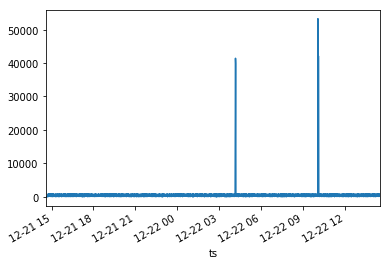

In [24]:
freq_feature_sample.plot.line()

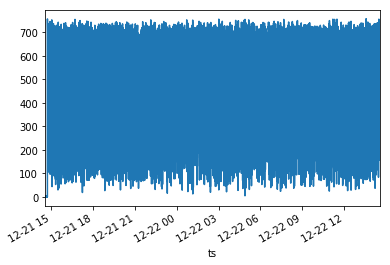

In [25]:
freq_feature_sample[freq_feature_sample  < 1000].plot.line()

In [26]:
freq_feature_sample_60 = get_sample_group_by_s(time_df, num_s=60, num_sample=None, func=sum)

/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


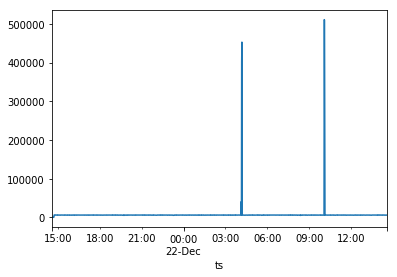

In [27]:
freq_feature_sample_60.plot.line()

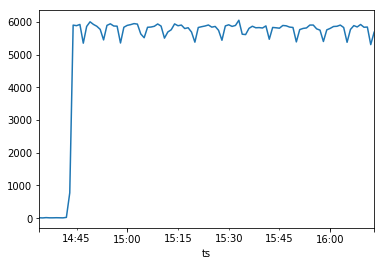

In [28]:
freq_feature_sample_60.head(100).plot.line()

In [29]:
porn_conn.conn_state.value_counts()

RSTOS0    268128
S0           227
SF            28
SH            21
S3             1
Name: conn_state, dtype: int64

In [30]:
porn_conn

freq_feature_sample_60 = get_sample_group_by_s(time_df, num_s=60, num_sample=None, func=sum)


/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
time_index_porn = porn_conn['ts']
time_index_porn = pd.to_datetime(time_index_porn, unit='s')

In [32]:
time_df_porn = pd.DataFrame({'num': [1] * len(time_index_porn)}, index=time_index_porn)

In [33]:
freq_feature_sample_porn_1 = get_sample_group_by_s(time_df=time_df_porn, num_s=1, num_sample=None, func=sum)

/Users/alperovich/miniconda3/envs/aaic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


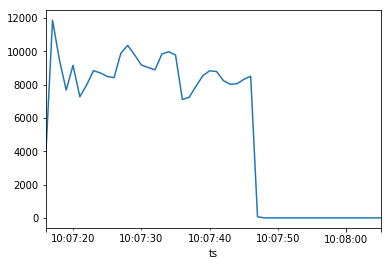

In [34]:
freq_feature_sample_porn_1.head(50).plot.line()

In [35]:
porn_conn

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,orig_bytes,orig_bytes_num
8635842,1.54547e+09,192.168.1.196,59784.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635966,1.54547e+09,192.168.1.196,17217.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635967,1.54547e+09,192.168.1.196,61635.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635968,1.54547e+09,192.168.1.196,28115.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635969,1.54547e+09,192.168.1.196,42776.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635970,1.54547e+09,192.168.1.196,57665.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635971,1.54547e+09,192.168.1.196,24266.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635972,1.54547e+09,192.168.1.196,48448.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635973,1.54547e+09,192.168.1.196,565.0,216.18.168.16,80.0,tcp,RSTOS0,0,0
8635974,1.54547e+09,192.168.1.196,30878.0,216.18.168.16,80.0,tcp,RSTOS0,0,0


In [36]:
features.to_csv('conn_log_features.csv')